# Question 5 Van der Pol equation
Consider the Van der Pol oscillator that describes a non-conservative oscillator with non-linear damping is described by the differential non-linear second order differential equation,

$$u'' =−\epsilon (u^2 −1)u' −u,$$
with $\epsilon$, and given the boundary conditions
$$u(0) = 0.0,$$ and, $$u(1) = 0.$$
Apply one iteration of the non-linear shooting method to approximate the solution from $0\leq t \leq 1$,using a stepsize of $h =0.2$.
##  Shooting method for a non-linear equation
To solve a non-linear Boundary Value Problem 
$$y''=f(t,y,y'), $$
with initial conditions $y(a)=\alpha$ and $y(b)=\beta$,
the equation is re-written as two Initial Value Problems
$$ y''(t,\lambda)=f(t,y(t,\lambda),y^{'}(t,\lambda))$$
with the initial conditions
$$y(a,\lambda)=\alpha \ \ y^{'}(a,\lambda)=\lambda $$
differentiating the boundary value problem with respect to $\lambda$ and let $z(t,\lambda)$ denote $\frac{\partial y}{\partial\lambda}(t,\lambda)$ we have
$$
\frac{\partial }{\partial \lambda}(y'') = \frac{\partial f}{\partial \lambda}=
\frac{\partial f}{\partial y^{'}}
\frac{\partial y^{'}}{\partial \lambda}+\frac{\partial f}{\partial y}
\frac{\partial y}{\partial \lambda},
$$
which is 
$$ z^{''}(t,\lambda)=\frac{\partial f}{\partial y^{'}}z^{'}(t,\lambda)+\frac{\partial f}{\partial y}z(t,\lambda) $$
and the initial conditions
$$z(a,\lambda)=0, \ \ \ z^{'}(a,\lambda)=1.$$
As we do not know $\lambda$ we us a Newton Raphson iterative method 
$$\lambda_k=\lambda_{k-1}-\frac{y(b,\lambda_{k-1})-\beta}{z(b,\lambda_{k-1})}.$$




In [1]:
import numpy as np
import math 

%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots
import warnings
warnings.filterwarnings("ignore")

In [2]:
class ListTable(list):
    """ Overridden list class which takes a 2-dimensional list of 
        the form [[1,2,3],[4,5,6]], and renders an HTML Table in 
        IPython Notebook. """
    
    def _repr_html_(self):
        html = ["<table>"]
        for row in self:
            html.append("<tr>")
            
            for col in row:
                html.append("<td>{0}</td>".format(col))
            
            html.append("</tr>")
        html.append("</table>")
        return ''.join(html)
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')



In [3]:
N=5
t_end=1.0
t_start=0.0
h=((t_end-t_start)/N)

time=np.arange(t_start,t_end+h/2,h)
ep=3.5
lamb=1

##  Shooting method for the Van der Pol
To Van der Pol equation
$$u'' =−\epsilon (u^2 −1)u' −u, $$
with $\epsilon= 3.5$, and given the initial conditions
$$u(0) = 0.0,$$ and, $$u(1) = 0,$$ the equation is re-written as two Initial Value Problems
$$ u''(t,\lambda)=−\epsilon (u^2 −1)u' −u$$
with the initial conditions
$$u(a,\lambda)=0 \ \ u^{'}(a,\lambda)=\lambda $$
and
$$ z^{''}(t,\lambda)=-\epsilon( u^2 -1)z^{'}(t,\lambda) +(-2\epsilon u u' -1)z(t,\lambda),$$
and the initial conditions
$$z(a,\lambda)=0, \ \ \ z^{'}(a,\lambda)=1.$$
As we do not know $\lambda$ we us a Newton Raphson iterative method 
$$\lambda_k=\lambda_{k-1}-\frac{y(b,\lambda_{k-1})-\beta}{z(b,\lambda_{k-1})}.$$
## Euler Approximation of the Van der Pol
To approximate the solution we apply the Euler method which gives, the first equation is divided into two difference equations,
$$ ud_{i+1}=ud_{i}+h[−\epsilon (u_i^2 −1)ud_i −u_i], \ \ \ ud_0=\lambda,$$
$$ u_{i+1}=u_{i}+h[ud_i], \ \ \ u_0=0,$$
and the second equation is also written as two difference equations
$$ zd_{i+1}=zd_{i}+h[-\epsilon( u_i^2 -1)zd_i +(-2\epsilon u_i ud_i -1)z_i], \ \ \ zd_0=1,$$
$$ z_{i+1}=z_{i}+z[zd_i], \ \ \ z_0=0,$$
where $h$ is the stepsize.
As we do not know $\lambda$ we us a Newton Raphson iterative method 
$$\lambda_k=\lambda_{k-1}-\frac{u_{5}-0}{z_{5}}.$$

In [4]:
def myfun_u(t,u,ud):
    ftw=ep*(1-u*u)*ud-u
    return ftw

def myfun_z(t,z,zd,u,ud):
   # ftw=-ep*(u*u-1)*zd+(-ep*2*u*ud*ud-1)*z
    ftw=-ep*(u*u-1)*zd+(-ep*2*u*ud-1)*z
    return ftw

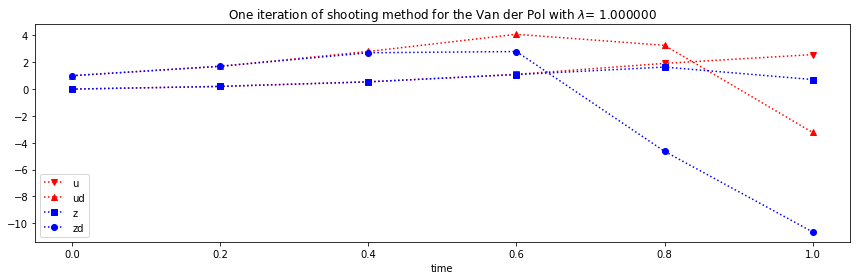

In [5]:

u=np.zeros(N+1)
ud=np.zeros(N+1)
u[0]=0
ud[0]=lamb
z=np.zeros(N+1)
zd=np.zeros(N+1)
z[0]=0
zd[0]=1
for i in range (0,N):
    # Euler Method
    ud[i+1]=ud[i]+h*myfun_u(time[i],u[i],ud[i])
    u[i+1]=u[i]+h*ud[i]
    zd[i+1]=zd[i]+h*myfun_z(time[i],z[i],zd[i],u[i],ud[i])
    z[i+1]=z[i]+h*zd[i]
    
    
lamb_new = lamb-(u[N]-0)/z[N]

fig = plt.figure(figsize=(12,4))
plt.plot(time, u, 'rv:', label='u')
plt.plot(time, ud, 'r^:', label='ud')
plt.plot(time, z, 'bs:', label='z')
plt.plot(time, zd, 'bo:', label='zd')
plt.xlabel('time')
plt.title('One iteration of shooting method for the Van der Pol with $\lambda$= %f '% lamb)
plt.legend()
plt.tight_layout()
plt.show()

In [6]:
print('The table below shows the output for one interation with lambda =',lamb)
table = ListTable()
table.append(['i','time','dy','y','dz','z'])
for i in range (0,N+1):
    table.append([i,round(time[i],4),round(ud[i],4),round(u[i],4),round(zd[i],4),round(z[i],4)])
    
table

The table below shows the output for one interation with lambda = 1


i,time,dy,y,dz,z
0,0.0,1.0,0.0,1.0,0.0
1,0.2,1.7,0.2,1.7,0.2
2,0.4,2.8024,0.54,2.7072,0.54
3,0.6,4.0841,1.1005,2.7976,1.0814
4,0.8,3.2606,1.9173,-4.6366,1.641
5,1.0,-3.2306,2.5694,-10.6413,0.7136


In [7]:
print('The new lambda=',lamb_new)


The new lambda= -2.600462697478842
